In [24]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from citipy import citipy
from api_keys import api_key
import time

In [25]:
# Initialize an empty list to hold cities from Citipy
cities = []

In [26]:
# Gather random Latitude/Longitude coordinates
# Credit starter_code notebook for helping implement this
lats = np.random.uniform(low=-90.000, high=90.000, size=1600)
lons = np.random.uniform(low=-180.000, high = 180.000, size=1600)
coords = list(zip(lats, lons))

In [27]:
# Use the Citipy module to get the nearest city for each random coordinate set
# Credit starter_code notebook for helping implement this
for coord in coords:
    # Use Citipy to get the nearest city to each coordinate set
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    # Add the city name to the initialized list if it is not already in the list
    if city not in cities:
        cities.append(city)
len(cities)

624

In [28]:
#Subset testing - we'll use this until we get the final deliverable working and then scale to be >500. 
# Initialize empty lists to hold all variables.
city = []
clouds = []
date = []
humidity = []
lat = []
lon = []
temp = []
wind = []

# Map initialized variables to dict keys
to_df = {
    'City': city,
    'Cloudiness': clouds,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lon': lon,
    'Max Temp': temp,
    'Wind Speed': wind
}

In [29]:
# Build URL query string
url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q='

In [30]:
# Send requests and store responses in initialized dictionary
for i in range(len(cities)):
    try:
        response = requests.get(url + cities[i]).json()
        city.append(response['name'])
        clouds.append(response['clouds']['all'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        print(f'Processing Record {i + 1} | {response["name"]}')
        time.sleep(1) # This may be unnecessary. Testing to be safe.
    except:
        print("Data not retrieved. Skipping...")
        pass
print('Retrieval complete!')

Processing Record 1 | Tiksi
Processing Record 2 | Hobart
Processing Record 3 | Mataura
Processing Record 4 | New Norfolk
Processing Record 5 | Butaritari
Processing Record 6 | Thompson
Processing Record 7 | Lumberton
Processing Record 8 | Kinango
Processing Record 9 | Rikitea
Data not retrieved. Skipping...
Processing Record 11 | Saskylakh
Processing Record 12 | Hermanus
Processing Record 13 | Pevek
Data not retrieved. Skipping...
Processing Record 15 | Albany
Processing Record 16 | Grand-Lahou
Processing Record 17 | Ushuaia
Processing Record 18 | Yulara
Processing Record 19 | Port Blair
Processing Record 20 | Busselton
Processing Record 21 | Kavieng
Processing Record 22 | Chuy
Processing Record 23 | Sajanan
Processing Record 24 | Kudahuvadhoo
Data not retrieved. Skipping...
Processing Record 26 | La Ronge
Processing Record 27 | Walvis Bay
Processing Record 28 | Emilio Carranza
Processing Record 29 | Norman Wells
Processing Record 30 | Lodja
Processing Record 31 | Honiara
Processing Re

Processing Record 250 | Keti Bandar
Processing Record 251 | Mujiayingzi
Processing Record 252 | Qorveh
Processing Record 253 | Shimoda
Processing Record 254 | Vila
Processing Record 255 | Buraydah
Processing Record 256 | Sarangani
Data not retrieved. Skipping...
Processing Record 258 | Mishkino
Processing Record 259 | Sovetskiy
Processing Record 260 | Lagoa
Processing Record 261 | Kaitangata
Processing Record 262 | Tromso
Processing Record 263 | Saposoa
Processing Record 264 | Beeville
Processing Record 265 | Saint-Augustin
Processing Record 266 | Upernavik
Processing Record 267 | Manta
Data not retrieved. Skipping...
Processing Record 269 | Kajaani
Processing Record 270 | Le Vauclin
Processing Record 271 | Warangal
Data not retrieved. Skipping...
Processing Record 273 | Pearl Lagoon
Processing Record 274 | San Luis
Processing Record 275 | Fortuna
Processing Record 276 | Hebi
Processing Record 277 | Sept-Iles
Processing Record 278 | Baykit
Data not retrieved. Skipping...
Processing Rec

Processing Record 499 | Rudnogorsk
Processing Record 500 | Hirara
Processing Record 501 | Takab
Processing Record 502 | Boende
Processing Record 503 | Majene
Data not retrieved. Skipping...
Data not retrieved. Skipping...
Processing Record 506 | Portsmouth
Processing Record 507 | Panjab
Processing Record 508 | Zambezi
Processing Record 509 | Bubaque
Processing Record 510 | Harrisburg
Processing Record 511 | Kenai
Data not retrieved. Skipping...
Processing Record 513 | Turan
Processing Record 514 | Preobrazheniye
Processing Record 515 | Boa Vista
Processing Record 516 | Zlotow
Processing Record 517 | Boyabat
Processing Record 518 | Nenjiang
Data not retrieved. Skipping...
Processing Record 520 | Derzhavinsk
Processing Record 521 | El Tigre
Processing Record 522 | Barghat
Processing Record 523 | Geraldton
Processing Record 524 | Okhotsk
Processing Record 525 | Shingu
Processing Record 526 | Mount Gambier
Processing Record 527 | Jaca
Processing Record 528 | Batticaloa
Data not retrieved. 

In [32]:
# Create a dataframe from the dictionary that was just populated
df_weather = pd.DataFrame(to_df)
df_weather.head()

,City,Cloudiness,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Tiksi,92,1539303171,94,71.64,128.87,27.67,3.51
1,Hobart,75,1539302400,62,-42.88,147.33,55.40,5.82
2,Mataura,92,1539303164,67,-46.19,168.86,44.23,20.29
3,New Norfolk,75,1539302400,62,-42.78,147.06,55.40,5.82
4,Butaritari,68,1539303407,100,3.07,172.79,82.75,9.78


In [33]:
# Output the weather data to a csv
df_weather.to_csv('Output/WeatherData.csv')

In [34]:
# Confirm the dataframe is large enough (>500)
# Just barely - it looks like we were able to retrieve enough records before reaching a limit.
len(city)

505

In [35]:
# Set the date
today = time.strftime('%m/%d/%Y') # Accidentally cleared cell outputs during cleanup - had to run again today

## Latitude vs. Temperature

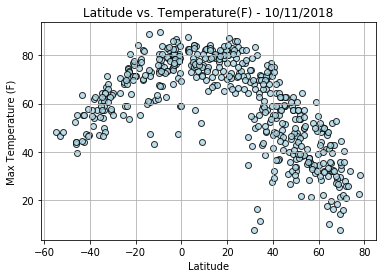

In [49]:
# Build Scatter Plot of Latitude vs. Temperature
plt.scatter(lat, temp, facecolors='lightblue', edgecolors='black', alpha=.8,)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Latitude vs. Temperature(F) - {today}')
plt.grid()
plt.savefig('Output/LatVTemp.png')
plt.show()

## Latitude vs. Humidity

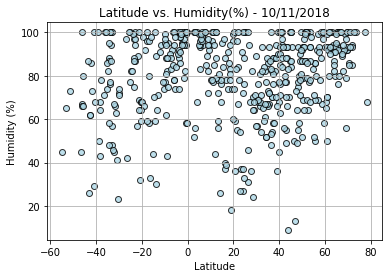

In [50]:
# Build Scatter Plot of Latitude vs. Humidity
plt.scatter(lat, humidity, facecolors='lightblue', edgecolors='black', alpha=.8)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Latitude vs. Humidity(%) - {today}')
plt.grid()
plt.savefig('Output/LatVHumid.png')
plt.show()

## Latitude vs. Cloudiness

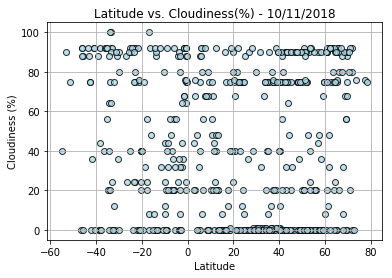

In [51]:
# Build Scatter Plot of Latitude vs. Cloudiness
plt.scatter(lat, clouds, facecolors='lightblue', edgecolors='black', alpha=.8)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Latitude vs. Cloudiness(%) - {today}')
plt.grid()
plt.savefig('Output/LatVCloud.png')
plt.show()